# Linear Algebra in Python

1. Introduction to Linear Algebra
2. Matrix-Vector Equations
3. Eigenvalues and Eigenvectors
4. Principal Component Analysis

The content is taken from "Linear Algebra for Data Science in R" in Datacamp. The purpose is to take the excellent content and code and put them here in Python code. 

## Introduction to Linear Algebra

### Creating Vectors

- To create a vector with the same numbers, use np.full. The R equivalnt is rep()
- To create a vector in a sequence, use np.arange. The R equivalent is seq()
- Manually create a vector using np.array. Use c() to create the same in R

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create an array with 2 rows of 5
arr_2row_of_5 = np.full((2,1), 5)
print (arr_2row_of_5)
print ("")
#create a 2-column array of 5
arr_2col_of_5 = np.full(2, 5)
print (arr_2col_of_5)
print ("")

# Create an array of odd numbers up to 9
# python excludes the last int, so use 10 in the stop arg
arr_odd_nums = np.arange(1, 11, 2)
print (arr_odd_nums)
print ("")

# Create an array of odd numbers up to 9
arr_even_nums = np.arange(2, 12, 2)
print (arr_even_nums)
print ("")

# create an array manually
# takes a list or tuple. Here, we use list.
arr_manual = np.array([2,3,1,0])
print (arr_manual)

[[5]
 [5]]

[5 5]

[1 3 5 7 9]

[ 2  4  6  8 10]

[2 3 1 0]


### Operations

- Addition
- Scalar Multiplication
- Component-wise Multiplication
    - This means you will multiply x_i with y_i and so forth

In [3]:
x = np.array([2,3,1,0])
y = np.array([5,10,15,20])

# Add x to y and print
print(x + y)

# Multiply z by 2 and print
print(2 * x)

# Multiply x and y by each other and print
print(x * y)

[ 7 13 16 20]
[4 6 2 0]
[10 30 15  0]


### Matrices

Use array to create matrices.

You can also use ndarray, but it is not as useful as array.

In numpy, there is a matrix class. However, it is limited to 2-D matrices, and performing operations using them is complicated if the end result is not 2-D. Additionally, using matrix does _not_ seem to increase efficient. So, there's no point in using them it seems.

In [4]:
x = np.array([[1, 2], [3, 4]])
print (x)

[[1 2]
 [3 4]]


In [5]:
x = np.ndarray(shape = (2,2))
x.fill(4)
print (x)

[[4. 4.]
 [4. 4.]]


### Matrix-Vector Compatibility

In [6]:
# 2x3 matrix
A = np.array([[1, 2, 3], 
             [3, 4, 5]])
b = np.array([1,2,3]) # vertical vector
b = np.array([[1,2,3]]) # horizontal vector
b = np.array([[1,2,3,]]).T # horizontal vector transposed

print (A)
print (b)

[[1 2 3]
 [3 4 5]]
[[1]
 [2]
 [3]]


In [7]:
# matrix multiplication on A and b

# 2x2 matrix (A) to stretch first component of b by 4
A = np.array([[4, 0], 
             [0, 1]])
b = np.array([1,1])
print (A)
print (b)
print (f"using matmul:{np.matmul(A,b)}")
print (f"using A@b: {A@b}")

[[4 0]
 [0 1]]
[1 1]
using matmul:[4 1]
using A@b: [4 1]


[[-1  0]
 [ 0  1]]
[2 1]
using matmul:[-2  1]
using A@b: [-2  1]
Reflect b about the x-axis: [-2  1]


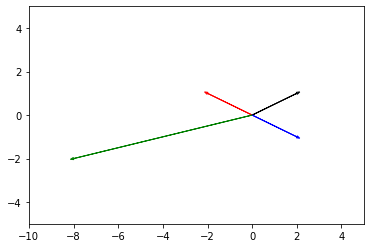

In [8]:
# matrix multiplication on A and b

# 2x2 matrix (A) to reflect b by the y-axis
A = np.array([[-1, 0], 
             [0, 1]])
b = np.array([2,1])
print (A)
print (b)
# reflect b
print (f"using matmul:{np.matmul(A,b)}")
print (f"using A@b: {A@b}")

# 2x2 matrix (B) to reflect b by the x-axis 
B = np.array([[1, 0], 
             [0, -1]])
print (f"Reflect b about the x-axis: {A@b}")
C = np.array([[-4, 0], 
             [0, -2]])
Ab = A@b
Bb = B@b
Cb = C@b 
# plt.figure(figsize = (10,10))
plt.xlim([-10, 5])
plt.ylim([-5, 5])
plt.arrow(0, 0, b[0], b[1],head_width=0.1)
plt.arrow(0,0, Ab[0], Ab[1], head_width=0.1, color = 'r')
plt.arrow(0,0, Bb[0], Bb[1], head_width=0.1, color = 'b')
plt.arrow(0,0, Cb[0], Cb[1], head_width=0.1, color = 'g')
plt.show()

### Matrix Multiplication - Order Matters

Matrix to Matrix multiplication is not commutative. This means that AB is not the same as BA.

In [9]:
# multiply A by B

# A is a matrix that ritates a 2-D vector by 45 degrees anticlockwise
A = np.array([[0.7071068, -0.7071068], 
             [0.7071068, 0.7071068]])

B = np.array([[1,0],
             [0,-1]])

b = np.array([1,1])
AB = A@B
print (f"AB = {A@B}")
print (f"ABb = {AB@b}")
print (f"BAb = {B@A@b}")
print (f"bBA = {b@B@A}")

AB = [[ 0.7071068  0.7071068]
 [ 0.7071068 -0.7071068]]
ABb = [1.4142136 0.       ]
BAb = [ 0.        -1.4142136]
bBA = [ 0.        -1.4142136]


### Inversing Matrix

Inversing matrix is a useful operation that will be used for many things which we will explore later. 

For now, we want to be able to get the Inverse, and know that the multiplying a matrix with its inverse yields the identity matrix, I. 

We can use np.linalg.inv() get the inverse, and np.identity() to create the identity matrix.

In [10]:
print (f"2x2 identity matrix: \n{np.identity(2)}")
print (f"Get inv of the id matrix: \n{np.linalg.inv(np.identity(2))}")

2x2 identity matrix: 
[[1. 0.]
 [0. 1.]]
Get inv of the id matrix: 
[[1. 0.]
 [0. 1.]]


In [11]:
# matrix A
A = np.array([[1,2],
             [-1,2]])

# inverse of A
Ainv = np.linalg.inv(A)

# A(Ainv)
AAinv = A@Ainv 

# Ainv(A)
AinvA = Ainv@A

print (f"A: \n{A}\n")
print (f"A Inverse: \n{Ainv}\n")
print (f"Multiply A by A inverse: \n{AAinv}\n")
print (f"Multiply A inverse by A: \n{AinvA}")

A: 
[[ 1  2]
 [-1  2]]

A Inverse: 
[[ 0.5  -0.5 ]
 [ 0.25  0.25]]

Multiply A by A inverse: 
[[1. 0.]
 [0. 1.]]

Multiply A inverse by A: 
[[1. 0.]
 [0. 1.]]
